<a href="https://colab.research.google.com/github/shivam060404/pred_Handwritten_digits/blob/main/Predict_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               ** Building a Multiclass Classification Neural Network Model**
#                 *Predicting or Recognizing Handwritten Digits*

---


---




**Importing the Libraries**

In [83]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
import tensorflow_datasets as tfds

**Creating input pipeline using tf.data API with keras**

In [85]:
(ds_train,ds_test) , ds_info = tfds.load(
    'mnist',
    split=["train","test"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,

)

In [86]:
ds_train.cardinality().numpy(),ds_test.cardinality().numpy()

(60000, 10000)

In [87]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [88]:
ds_info.features["label"].names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

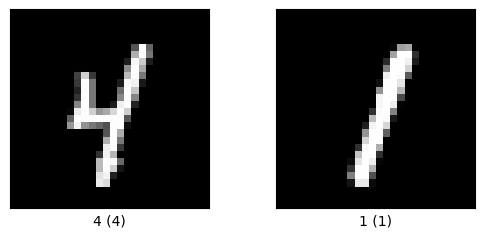

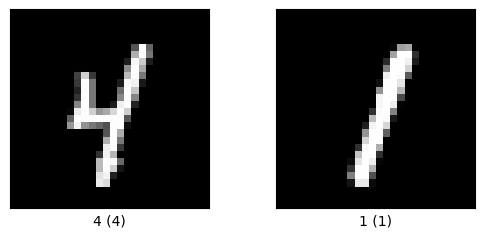

In [89]:
tfds.show_examples(ds_train,ds_info,rows=1,cols=2)

Normalizing the datapoints within the scale of 0 to 1 pixel value(optimization)

In [90]:
def normalize_img(image,label):
    """Normalizes images:'uint8'->'float32'"""
    return tf.cast(image,tf.float32)/255.,label

In [91]:
ds_train = ds_train.map(normalize_img,num_parallel_calls=tf.data.AUTOTUNE)
ds_train=ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

**Build an Evaluation Pipeline**

In [92]:
ds_test = ds_test.map(normalize_img,num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

**Creating a neural network**

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation



In [94]:
model=Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(512,activation='sigmoid',name = 'Hidden_layer1'),
    Dense(128,activation='sigmoid',name = 'Hidden_layer2'),
    Dense(10,activation='softmax',name = 'Output_layer')

])

In [95]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 Hidden_layer1 (Dense)       (None, 512)               401920    
                                                                 
 Hidden_layer2 (Dense)       (None, 128)               65664     
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 468874 (1.79 MB)
Trainable params: 468874 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compiling the Neural network**

In [96]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],

)

**Evaluating a trained neural network**

In [97]:
multiclass_classifier = model.fit(ds_train, epochs=20, validation_data=ds_test)

Epoch 1/20
469/469 [==============================] - 14s 17ms/step - loss: 0.5444 - sparse_categorical_accuracy: 0.8558 - val_loss: 0.2518 - val_sparse_categorical_accuracy: 0.9278
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.2222 - sparse_categorical_accuracy: 0.9350 - val_loss: 0.1798 - val_sparse_categorical_accuracy: 0.9463
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1647 - sparse_categorical_accuracy: 0.9505 - val_loss: 0.1677 - val_sparse_categorical_accuracy: 0.9470
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.1265 - sparse_categorical_accuracy: 0.9629 - val_loss: 0.1242 - val_sparse_categorical_accuracy: 0.9622
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0997 - sparse_categorical_accuracy: 0.9707 - val_loss: 0.1000 - val_sparse_categorical_accuracy: 0.9690
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0798 - sparse_cat

In [99]:
score = model.evaluate(ds_test,verbose=0)
print('Test loss',score[0])
print('Test Accuracy',score[1])


Test loss 0.07619353383779526
Test Accuracy 0.9804999828338623


**Plotting the training accuracy and validation accuracy**

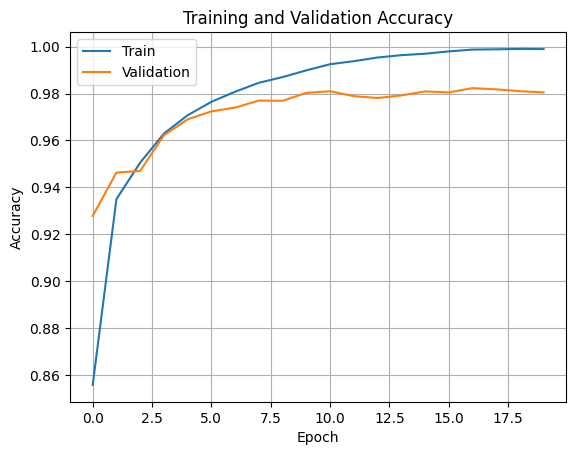

In [103]:
plt.plot(multiclass_classifier.history['sparse_categorical_accuracy'])
plt.plot(multiclass_classifier.history['val_sparse_categorical_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

**Plotting the training loss and validation loss**

<function matplotlib.pyplot.show(close=None, block=None)>

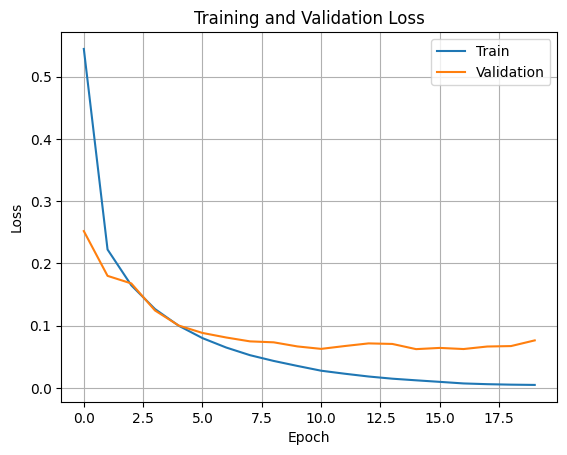

In [104]:
plt.plot(multiclass_classifier.history['loss'])
plt.plot(multiclass_classifier.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show

**Inference or Predictions using a trained neural network  **

In [105]:
image_batch,label_batch = next(iter(ds_test))
label_batch[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([2, 0, 4, 8, 7, 6, 0, 6, 3, 1])>

In [106]:
y_pred = model.predict(image_batch)
y_pred[:10]

4/4 [==============================] - 0s 4ms/step


array([[2.0590303e-10, 5.1230721e-08, 9.9999982e-01, 1.7506308e-08,
        2.6516158e-09, 1.1086464e-11, 1.0440476e-09, 1.2662306e-10,
        1.1027473e-08, 6.0415589e-11],
       [9.9988896e-01, 1.0938654e-07, 7.2186515e-09, 6.6544409e-11,
        5.0996514e-09, 3.6882718e-06, 1.0701217e-04, 1.6297490e-07,
        1.5770473e-08, 2.4520919e-08],
       [4.8188120e-10, 8.2602554e-08, 7.5667972e-10, 4.6509155e-10,
        9.9999791e-01, 6.9280198e-10, 1.0508849e-08, 1.4240545e-07,
        1.9682496e-08, 1.7576519e-06],
       [1.9153992e-09, 1.1786829e-08, 7.8445206e-09, 3.2375951e-08,
        1.9343757e-10, 4.0987818e-08, 5.6575615e-09, 6.0011544e-11,
        9.9999970e-01, 1.6541564e-07],
       [1.5693246e-08, 1.0376960e-07, 2.6942364e-09, 5.5589226e-08,
        7.4772633e-09, 4.6809459e-09, 4.5643180e-14, 9.9999624e-01,
        3.9049648e-09, 3.5771880e-06],
       [9.1912646e-08, 6.4651729e-08, 1.3784195e-08, 1.6656932e-09,
        4.0810892e-08, 3.0183222e-05, 9.9996918e-01, 6.19

In [107]:
y_pred = np.array([np.argmax(pred)  for pred in y_pred ])
y_pred[:10] , label_batch[:10]


(array([2, 0, 4, 8, 7, 6, 0, 6, 3, 1]),
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([2, 0, 4, 8, 7, 6, 0, 6, 3, 1])>)